In [35]:
import math
import warnings

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.cross_decomposition import PLSRegression

%matplotlib inline
sns.set_style('white')

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

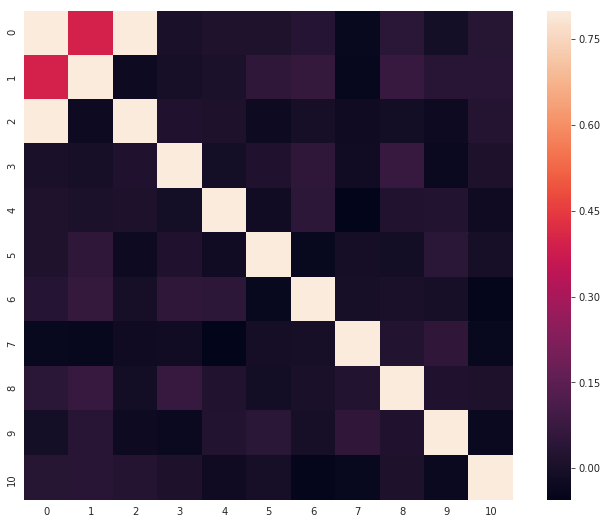

In [40]:
#number of datapoints in outcome
n = 1000

#number of features
p = 10

# create a random normally distributed data for parameters
X = np.random.normal(size=n*p).reshape((n,p))

#create normally distributed outcome related to paramaters but with noise
y = X[:,0] + 2*X[:,1] + np.random.normal(size=n*1) + 5

#check out correlations. Fist column is the outcome.
f, ax = plt.subplots(figsize=(12,9))
corrmat = pd.DataFrame(np.insert(X, 0, y, axis=1)).corr()

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

R-squared regression: 0.8188743738615807
R-squared PLSR: 0.8188741795249266


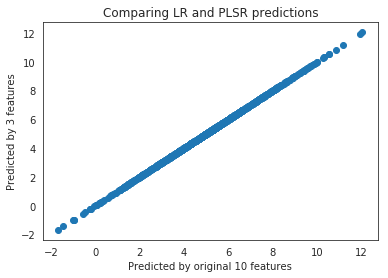

In [42]:
# Fit a linear model with all 10 features
regr = linear_model.LinearRegression()
regr.fit(X,y)

#save the predicted values
Y_pred = regr.predict(X)
print('R-squared regression:', regr.score(X,y))

#Fit a linear model using Partial Least Squares Regression
#reduce feature space to 3 dimensions
pls1 = PLSRegression(n_components=3)

#Reduce X to R(X) and regress on y.
pls1.fit(X, y)

#save the predicted values
Y_PLS_pred = pls1.predict(X)
print('R-squared PLSR:', pls1.score(X, y))

#compare the predictions of the two models
plt.scatter(Y_pred, Y_PLS_pred)
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by 3 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

R-squared regression: 0.8188743738615807
R-squared PLSR: 0.8188743738567734


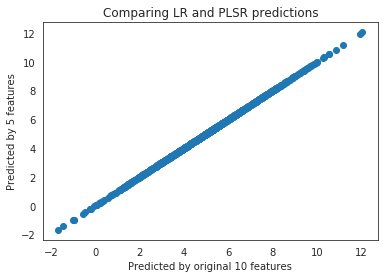

In [45]:
print('R-squared regression:', regr.score(X,y))
pls2 = PLSRegression(n_components=5)

# Reduce X to R(X) and regress on y.
pls2.fit(X, y)

# Save predicted values.
Y_PLS_pred = pls2.predict(X)
print('R-squared PLSR:', pls2.score(X, y))

# Compare the predictions of the two models
plt.scatter(Y_pred,Y_PLS_pred) 
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by 5 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

R-squared regression: 0.8188743738615807
R-squared PLSR: 0.8188351451430728


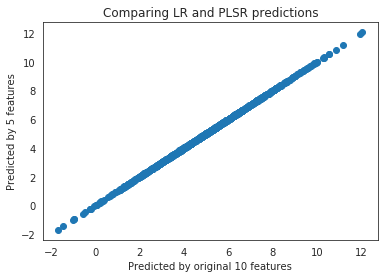

In [46]:
print('R-squared regression:', regr.score(X,y))
pls3 = PLSRegression(n_components=2)

# Reduce X to R(X) and regress on y.
pls3.fit(X, y)

# Save predicted values.
Y_PLS_pred = pls3.predict(X)
print('R-squared PLSR:', pls3.score(X, y))

# Compare the predictions of the two models
plt.scatter(Y_pred,Y_PLS_pred) 
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by 5 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()